In [9]:
import requests
import pandas as pd
import requests
from IPython.display import display
import requests
from PIL import Image
from io import BytesIO

In [5]:
def get_pokemon_evolution(pokemon_name):
    # Obtener información del Pokémon
    url = f"https://pokeapi.co/api/v2/pokemon-species/{pokemon_name.lower()}/"
    response = requests.get(url)
    
    if response.status_code != 200:
        return f"Error: No se encontró información para '{pokemon_name}'"
    
    species_data = response.json()
    
    # Obtener la URL de la cadena de evolución
    evolution_chain_url = species_data["evolution_chain"]["url"]
    
    # Obtener la cadena de evolución
    response = requests.get(evolution_chain_url)
    if response.status_code != 200:
        return "Error al obtener la cadena de evolución."
    
    evolution_data = response.json()
    
    # Extraer la cadena de evoluciones con imágenes
    evolution_chain = []
    current_evolution = evolution_data["chain"]
    
    while current_evolution:
        species_name = current_evolution["species"]["name"]
        sprite_url = f"https://pokeapi.co/api/v2/pokemon/{species_name}/"
        sprite_response = requests.get(sprite_url)
        
        if sprite_response.status_code == 200:
            sprite_data = sprite_response.json()
            sprite = sprite_data["sprites"]["front_default"]
        else:
            sprite = None
        
        evolution_chain.append((species_name, sprite))
        
        if "evolves_to" in current_evolution and current_evolution["evolves_to"]:
            current_evolution = current_evolution["evolves_to"][0]  # Tomamos la primera evolución
        else:
            break
    
    return evolution_chain

In [7]:
pokemon = "charmander"  # Cambia esto por el nombre del Pokémon que quieras consultar
evolutions = get_pokemon_evolution(pokemon)
print(f"Evolución de {pokemon}: {evolutions}")

Evolución de charmander: [('charmander', 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/4.png'), ('charmeleon', 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/5.png'), ('charizard', 'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/6.png')]


charmander


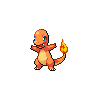

charmeleon


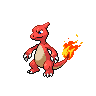

charizard


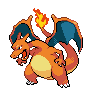

In [10]:
for name, img_url in evolutions:
    if img_url:
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))
        print(name)
        display(img)